In [1]:
import numpy as np
import torch
import torch.nn as nn
from torch_geometric.loader import DataLoader

from exploration.dataset import PyGAcademicGraph

from utils import set_all_seeds, train, evaluate, plot_MSE_scores

from exploitation.models import GAT, MPGCN_Net, GCN


%load_ext autoreload
%autoreload 2

NUM_EXPERIMENTS = 5
set_all_seeds(seed=4)

## Original Graphs Without Weights

In [2]:
batch_size = 1

# train dataset
train_dataset = PyGAcademicGraph(split="train", setting="inductive")
train_dataloader = DataLoader(train_dataset, batch_size=batch_size)

# val dataset
val_dataset = PyGAcademicGraph(split="val", setting="inductive")
val_dataloader = DataLoader(val_dataset, batch_size=batch_size)

# test dataset
test_dataset = PyGAcademicGraph(split="test", setting="inductive")
test_dataloader = DataLoader(test_dataset, batch_size=batch_size)

# number of features
n_features = train_dataset[0].x.shape[1]

print("Number of samples in the train dataset: ", len(train_dataset))
print("Number of samples in the val dataset: ", len(test_dataset))
print("Number of samples in the test dataset: ", len(test_dataset))
print("Output of one sample from the train dataset: ", train_dataset[0])
print("Edge_index :")
print(train_dataset[0].edge_index)
print("Number of features per node: ", n_features)

Number of samples in the train dataset:  9
Number of samples in the val dataset:  9
Number of samples in the test dataset:  9
Output of one sample from the train dataset:  Data(edge_index=[2, 36936], y=[359], x=[359, 8], edge_attr=[36936, 3], domain='Academia', train_mask=[359], val_mask=[359], test_mask=[359], mask=[359])
Edge_index :
tensor([[  0,   0,   0,  ..., 357, 358, 358],
        [  1,  89, 121,  ..., 352,  89, 358]])
Number of features per node:  8


### Message-passing GCN Without Weights

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("\nDevice: ", device)

model_name = "Message-passing GCN without weights"

num_epochs = 500
all_best_models = []
all_epoch_lists = []
all_MSEs = []
for _ in range(NUM_EXPERIMENTS):
    graph_convolution_no_weights = MPGCN_Net(
        in_channels=n_features,
        hidden_channels=64,
        out_channels=1,
    ).to(device)

    loss_fcn = nn.MSELoss()
    optimizer = torch.optim.Adam(graph_convolution_no_weights.parameters(), lr=0.001)
    epoch_list, MSEs, best_model = train(graph_convolution_no_weights, loss_fcn, device, optimizer, num_epochs, train_dataloader, val_dataloader)
    all_best_models.append(best_model)
    all_epoch_lists.append(epoch_list)
    all_MSEs.append(MSEs)


Device:  cpu
Epoch 00001 | Loss: 0.2395
MSE: 0.2197
Epoch 00002 | Loss: 0.2395
Epoch 00003 | Loss: 0.2395
Epoch 00004 | Loss: 0.2395
Epoch 00005 | Loss: 0.2395
Epoch 00006 | Loss: 0.2395
MSE: 0.2197
Epoch 00007 | Loss: 0.2395
Epoch 00008 | Loss: 0.2395
Epoch 00009 | Loss: 0.2395
Epoch 00010 | Loss: 0.2395
Epoch 00011 | Loss: 0.2395
MSE: 0.2197
Epoch 00012 | Loss: 0.2395
Epoch 00013 | Loss: 0.2395
Epoch 00014 | Loss: 0.2395
Epoch 00015 | Loss: 0.2395
Epoch 00016 | Loss: 0.2395
MSE: 0.2197
Epoch 00017 | Loss: 0.2395
Epoch 00018 | Loss: 0.2395
Epoch 00019 | Loss: 0.2395
Epoch 00020 | Loss: 0.2395
Epoch 00021 | Loss: 0.2395
MSE: 0.2197
Epoch 00022 | Loss: 0.2395
Epoch 00023 | Loss: 0.2395
Epoch 00024 | Loss: 0.2395
Epoch 00025 | Loss: 0.2395
Epoch 00026 | Loss: 0.2395
MSE: 0.2197
Epoch 00027 | Loss: 0.2395
Epoch 00028 | Loss: 0.2395
Epoch 00029 | Loss: 0.2395
Epoch 00030 | Loss: 0.2395
Epoch 00031 | Loss: 0.2395
MSE: 0.2197
Epoch 00032 | Loss: 0.2395
Epoch 00033 | Loss: 0.2395
Epoch 00034

MSE of Message-passing GCN without weights-0 on the test set: 0.2490
MSE of Message-passing GCN without weights-1 on the test set: 0.2490
MSE of Message-passing GCN without weights-2 on the test set: 0.2490
MSE of Message-passing GCN without weights-3 on the test set: 0.2490
MSE of Message-passing GCN without weights-4 on the test set: 0.2490
OVERALL: MSE of Message-passing GCN without weights on the test set: 0.2490


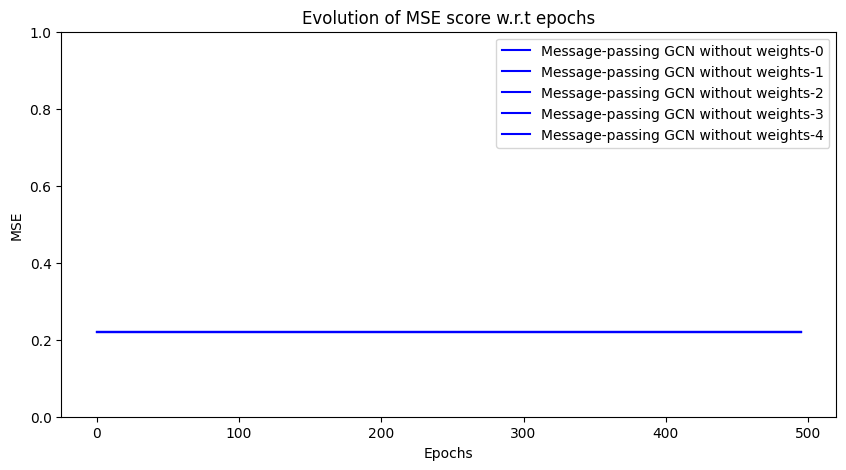

In [4]:
all_MSE_tests = []
for i in range(NUM_EXPERIMENTS):
    MSE_test = evaluate(all_best_models[i], loss_fcn, device, test_dataloader)
    print(f"MSE of {model_name}-{i} on the test set: {MSE_test:.4f}")
    all_MSE_tests.append(MSE_test)
print(f"OVERALL: MSE of {model_name} on the test set: {np.median(np.array(all_MSE_tests)):.4f}")

plot_MSE_scores(all_epoch_lists, all_MSEs, model_name=model_name)

### GAT Without Weights

In [5]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("\nDevice: ", device)

model_name = "GAT without weights"

num_epochs = 500
all_best_models = []
all_epoch_lists = []
all_MSEs = []
for _ in range(NUM_EXPERIMENTS):
    graph_convolution_no_weights = GAT(
        input_size=n_features,
        hidden_size=32,
        output_size=1,
        num_layers=1,
        heads=2
    ).to(device)

    loss_fcn = nn.MSELoss()
    optimizer = torch.optim.Adam(graph_convolution_no_weights.parameters(), lr=0.005)
    epoch_list, MSEs, best_model = train(graph_convolution_no_weights, loss_fcn, device, optimizer, num_epochs, train_dataloader, val_dataloader)
    all_best_models.append(best_model)
    all_epoch_lists.append(epoch_list)
    all_MSEs.append(MSEs)


Device:  cpu
Epoch 00001 | Loss: 0.2395
MSE: 0.2197
Epoch 00002 | Loss: 0.2395
Epoch 00003 | Loss: 0.2393
Epoch 00004 | Loss: 0.2395
Epoch 00005 | Loss: 0.2395
Epoch 00006 | Loss: 0.2392
MSE: 0.2197
Epoch 00007 | Loss: 0.2395
Epoch 00008 | Loss: 0.2395
Epoch 00009 | Loss: 0.2395
Epoch 00010 | Loss: 0.2395
Epoch 00011 | Loss: 0.2390
MSE: 0.2197
Epoch 00012 | Loss: 0.2395
Epoch 00013 | Loss: 0.2395
Epoch 00014 | Loss: 0.2392
Epoch 00015 | Loss: 0.2394
Epoch 00016 | Loss: 0.2395
MSE: 0.2197
Epoch 00017 | Loss: 0.2395
Epoch 00018 | Loss: 0.2395
Epoch 00019 | Loss: 0.2395
Epoch 00020 | Loss: 0.2395
Epoch 00021 | Loss: 0.2395
MSE: 0.2197
Epoch 00022 | Loss: 0.2395
Epoch 00023 | Loss: 0.2395
Epoch 00024 | Loss: 0.2395
Epoch 00025 | Loss: 0.2395
Epoch 00026 | Loss: 0.2395
MSE: 0.2197
Epoch 00027 | Loss: 0.2395
Epoch 00028 | Loss: 0.2395
Epoch 00029 | Loss: 0.2395
Epoch 00030 | Loss: 0.2395
Epoch 00031 | Loss: 0.2395
MSE: 0.2197
Epoch 00032 | Loss: 0.2395
Epoch 00033 | Loss: 0.2395
Epoch 00034

MSE of GAT without weights-0 on the test set: 0.2490
MSE of GAT without weights-1 on the test set: 0.0484
MSE of GAT without weights-2 on the test set: 0.2485
MSE of GAT without weights-3 on the test set: 0.2490
MSE of GAT without weights-4 on the test set: 0.2490
OVERALL: MSE of GAT without weights on the test set: 0.2490


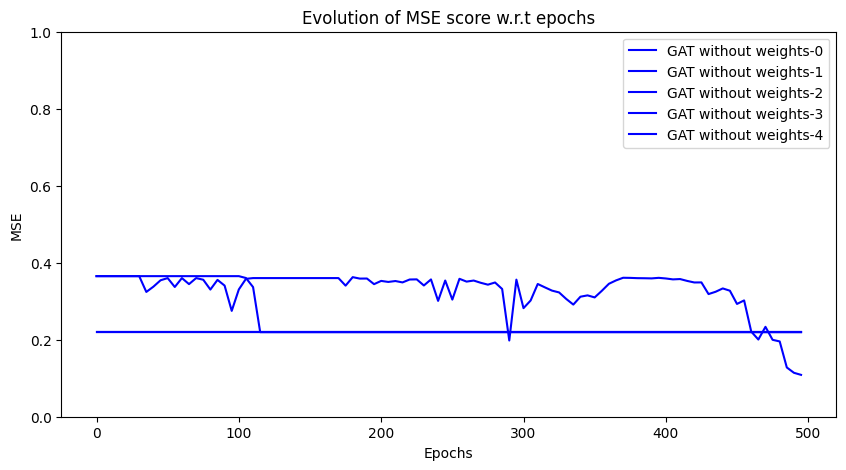

In [6]:
all_MSE_tests = []
for i in range(NUM_EXPERIMENTS):
    MSE_test = evaluate(all_best_models[i], loss_fcn, device, test_dataloader)
    print(f"MSE of {model_name}-{i} on the test set: {MSE_test:.4f}")
    all_MSE_tests.append(MSE_test)
print(f"OVERALL: MSE of {model_name} on the test set: {np.median(np.array(all_MSE_tests)):.4f}")

plot_MSE_scores(all_epoch_lists, all_MSEs, model_name=model_name)

### GCN Without Weights

In [7]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("\nDevice: ", device)

model_name = "GCN without weights"

num_epochs = 500
all_best_models = []
all_epoch_lists = []
all_MSEs = []
for _ in range(NUM_EXPERIMENTS):
    graph_convolution_no_weights = GCN(
        input_size=n_features,
        hidden_size=64,
        output_size=1
    ).to(device)

    loss_fcn = nn.MSELoss()
    optimizer = torch.optim.Adam(graph_convolution_no_weights.parameters(), lr=0.002)
    epoch_list, MSEs, best_model = train(graph_convolution_no_weights, loss_fcn, device, optimizer, num_epochs, train_dataloader, val_dataloader)
    all_best_models.append(best_model)
    all_epoch_lists.append(epoch_list)
    all_MSEs.append(MSEs)


Device:  cpu
Epoch 00001 | Loss: 0.3442
MSE: 0.3651
Epoch 00002 | Loss: 0.3442
Epoch 00003 | Loss: 0.3442
Epoch 00004 | Loss: 0.3442
Epoch 00005 | Loss: 0.3442
Epoch 00006 | Loss: 0.3442
MSE: 0.3651
Epoch 00007 | Loss: 0.3442
Epoch 00008 | Loss: 0.3442
Epoch 00009 | Loss: 0.3442
Epoch 00010 | Loss: 0.3441
Epoch 00011 | Loss: 0.3439
MSE: 0.3651
Epoch 00012 | Loss: 0.3431
Epoch 00013 | Loss: 0.3422
Epoch 00014 | Loss: 0.3402
Epoch 00015 | Loss: 0.3379
Epoch 00016 | Loss: 0.3370
MSE: 0.3651
Epoch 00017 | Loss: 0.3362
Epoch 00018 | Loss: 0.3353
Epoch 00019 | Loss: 0.3338
Epoch 00020 | Loss: 0.3314
Epoch 00021 | Loss: 0.3284
MSE: 0.3601
Epoch 00022 | Loss: 0.3223
Epoch 00023 | Loss: 0.3075
Epoch 00024 | Loss: 0.2709
Epoch 00025 | Loss: 0.2119
Epoch 00026 | Loss: 0.1736
MSE: 0.2370
Epoch 00027 | Loss: 0.1647
Epoch 00028 | Loss: 0.1657
Epoch 00029 | Loss: 0.1636
Epoch 00030 | Loss: 0.1583
Epoch 00031 | Loss: 0.1583
MSE: 0.2137
Epoch 00032 | Loss: 0.1591
Epoch 00033 | Loss: 0.1593
Epoch 00034

MSE of GCN without weights-0 on the test set: 0.2490
MSE of GCN without weights-1 on the test set: 0.2169
MSE of GCN without weights-2 on the test set: 0.2496
MSE of GCN without weights-3 on the test set: 0.3389
MSE of GCN without weights-4 on the test set: 0.2397
OVERALL: MSE of GCN without weights on the test set: 0.2490


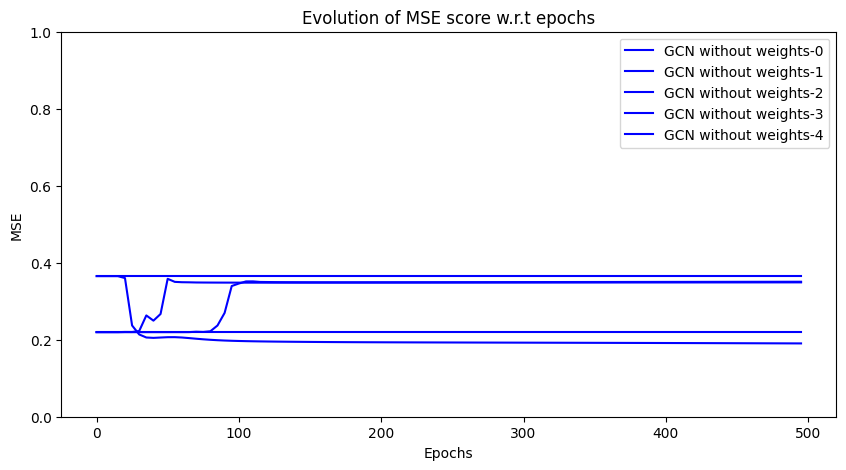

In [8]:
all_MSE_tests = []
for i in range(NUM_EXPERIMENTS):
    MSE_test = evaluate(all_best_models[i], loss_fcn, device, test_dataloader)
    print(f"MSE of {model_name}-{i} on the test set: {MSE_test:.4f}")
    all_MSE_tests.append(MSE_test)
print(f"OVERALL: MSE of {model_name} on the test set: {np.median(np.array(all_MSE_tests)):.4f}")

plot_MSE_scores(all_epoch_lists, all_MSEs, model_name=model_name)

## Sparsified Graphs Without Weights

In [9]:
batch_size = 1
threshold = 15

# train dataset
train_dataset = PyGAcademicGraph(split="train", setting="inductive", sparsify_threshold=threshold)
train_dataloader = DataLoader(train_dataset, batch_size=batch_size)

# val dataset
val_dataset = PyGAcademicGraph(split="val", setting="inductive", sparsify_threshold=threshold)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size)

# test dataset
test_dataset = PyGAcademicGraph(split="test", setting="inductive", sparsify_threshold=threshold)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size)

# number of features
n_features = train_dataset[0].x.shape[1]

print("Number of samples in the train dataset: ", len(train_dataset))
print("Number of samples in the val dataset: ", len(test_dataset))
print("Number of samples in the test dataset: ", len(test_dataset))
print("Output of one sample from the train dataset: ", train_dataset[0])
print("Edge_index :")
print(train_dataset[0].edge_index)
print("Number of features per node: ", n_features)

Number of samples in the train dataset:  9
Number of samples in the val dataset:  9
Number of samples in the test dataset:  9
Output of one sample from the train dataset:  Data(edge_index=[2, 3355], y=[359], x=[359, 8], edge_attr=[3355, 3], domain='Academia', train_mask=[359], val_mask=[359], test_mask=[359], mask=[359])
Edge_index :
tensor([[  0,   0,   0,  ..., 354, 355, 356],
        [ 89, 183,   0,  ..., 354, 355, 356]])
Number of features per node:  8


### Sparsified Message-passing GCN Without Weights

In [10]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("\nDevice: ", device)

model_name = "Sparsified message-passing GCN without weights"

num_epochs = 500
all_best_models = []
all_epoch_lists = []
all_MSEs = []
for _ in range(NUM_EXPERIMENTS):
    graph_convolution_no_weights = MPGCN_Net(
        in_channels=n_features,
        hidden_channels=64,
        out_channels=1
    ).to(device)

    loss_fcn = nn.MSELoss()
    optimizer = torch.optim.Adam(graph_convolution_no_weights.parameters(), lr=0.001)
    epoch_list, MSEs, best_model = train(graph_convolution_no_weights, loss_fcn, device, optimizer, num_epochs, train_dataloader, val_dataloader)
    all_best_models.append(best_model)
    all_epoch_lists.append(epoch_list)
    all_MSEs.append(MSEs)


Device:  cpu
Epoch 00001 | Loss: 0.2395
MSE: 0.2197
Epoch 00002 | Loss: 0.2395
Epoch 00003 | Loss: 0.2395
Epoch 00004 | Loss: 0.2395
Epoch 00005 | Loss: 0.2395
Epoch 00006 | Loss: 0.2395
MSE: 0.2197
Epoch 00007 | Loss: 0.2395
Epoch 00008 | Loss: 0.2395
Epoch 00009 | Loss: 0.2392
Epoch 00010 | Loss: 0.2382
Epoch 00011 | Loss: 0.2306
MSE: 0.2176
Epoch 00012 | Loss: 0.1507
Epoch 00013 | Loss: 0.0983
Epoch 00014 | Loss: 0.0806
Epoch 00015 | Loss: 0.0663
Epoch 00016 | Loss: 0.0692
MSE: 0.2153
Epoch 00017 | Loss: 0.0596
Epoch 00018 | Loss: 0.0485
Epoch 00019 | Loss: 0.0310
Epoch 00020 | Loss: 0.0285
Epoch 00021 | Loss: 0.0263
MSE: 0.1318
Epoch 00022 | Loss: 0.0261
Epoch 00023 | Loss: 0.0229
Epoch 00024 | Loss: 0.0217
Epoch 00025 | Loss: 0.0227
Epoch 00026 | Loss: 0.0220
MSE: 0.0741
Epoch 00027 | Loss: 0.0213
Epoch 00028 | Loss: 0.0213
Epoch 00029 | Loss: 0.0212
Epoch 00030 | Loss: 0.0210
Epoch 00031 | Loss: 0.0208
MSE: 0.0663
Epoch 00032 | Loss: 0.0206
Epoch 00033 | Loss: 0.0205
Epoch 00034

MSE of Sparsified message-passing GCN without weights-0 on the test set: 0.0324
MSE of Sparsified message-passing GCN without weights-1 on the test set: 0.0285
MSE of Sparsified message-passing GCN without weights-2 on the test set: 0.2490
MSE of Sparsified message-passing GCN without weights-3 on the test set: 0.0493
MSE of Sparsified message-passing GCN without weights-4 on the test set: 0.0380
OVERALL: MSE of Sparsified message-passing GCN without weights on the test set: 0.0380


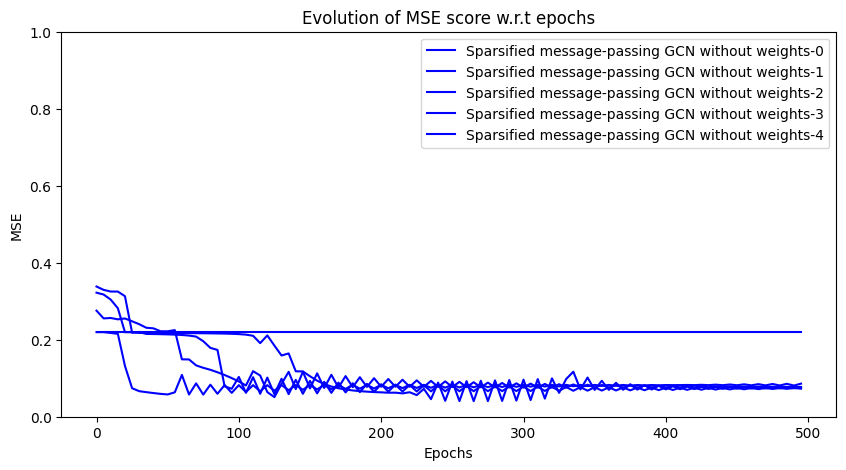

In [11]:
all_MSE_tests = []
for i in range(NUM_EXPERIMENTS):
    MSE_test = evaluate(all_best_models[i], loss_fcn, device, test_dataloader)
    print(f"MSE of {model_name}-{i} on the test set: {MSE_test:.4f}")
    all_MSE_tests.append(MSE_test)
print(f"OVERALL: MSE of {model_name} on the test set: {np.median(np.array(all_MSE_tests)):.4f}")

plot_MSE_scores(all_epoch_lists, all_MSEs, model_name=model_name)

### Sparsified GAT Without Weights

In [12]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("\nDevice: ", device)

model_name = "Sparsified GAT without weights"

num_epochs = 500
all_best_models = []
all_epoch_lists = []
all_MSEs = []
for _ in range(NUM_EXPERIMENTS):
    graph_convolution_no_weights = GAT(
        input_size=n_features,
        hidden_size=32,
        output_size=1,
        num_layers=1,
        heads=2
    ).to(device)

    loss_fcn = nn.MSELoss()
    optimizer = torch.optim.Adam(graph_convolution_no_weights.parameters(), lr=0.005)
    epoch_list, MSEs, best_model = train(graph_convolution_no_weights, loss_fcn, device, optimizer, num_epochs, train_dataloader, val_dataloader)
    all_best_models.append(best_model)
    all_epoch_lists.append(epoch_list)
    all_MSEs.append(MSEs)


Device:  cpu
Epoch 00001 | Loss: 0.3897
MSE: 0.4289
Epoch 00002 | Loss: 0.3956
Epoch 00003 | Loss: 0.3868
Epoch 00004 | Loss: 0.3820
Epoch 00005 | Loss: 0.3398
Epoch 00006 | Loss: 0.3260
MSE: 0.3651
Epoch 00007 | Loss: 0.3193
Epoch 00008 | Loss: 0.3155
Epoch 00009 | Loss: 0.3013
Epoch 00010 | Loss: 0.3035
Epoch 00011 | Loss: 0.3054
MSE: 0.3651
Epoch 00012 | Loss: 0.3071
Epoch 00013 | Loss: 0.3051
Epoch 00014 | Loss: 0.3029
Epoch 00015 | Loss: 0.3061
Epoch 00016 | Loss: 0.2975
MSE: 0.3651
Epoch 00017 | Loss: 0.2940
Epoch 00018 | Loss: 0.3001
Epoch 00019 | Loss: 0.2969
Epoch 00020 | Loss: 0.2953
Epoch 00021 | Loss: 0.2982
MSE: 0.3651
Epoch 00022 | Loss: 0.3018
Epoch 00023 | Loss: 0.2979
Epoch 00024 | Loss: 0.2989
Epoch 00025 | Loss: 0.2967
Epoch 00026 | Loss: 0.3017
MSE: 0.3651
Epoch 00027 | Loss: 0.2949
Epoch 00028 | Loss: 0.2989
Epoch 00029 | Loss: 0.3031
Epoch 00030 | Loss: 0.2968
Epoch 00031 | Loss: 0.3046
MSE: 0.3651
Epoch 00032 | Loss: 0.3035
Epoch 00033 | Loss: 0.3007
Epoch 00034

MSE of Sparsified GAT without weights-0 on the test set: 0.3389
MSE of Sparsified GAT without weights-1 on the test set: 0.0237
MSE of Sparsified GAT without weights-2 on the test set: 0.0226
MSE of Sparsified GAT without weights-3 on the test set: 0.3389
MSE of Sparsified GAT without weights-4 on the test set: 0.0236
OVERALL: MSE of Sparsified GAT without weights on the test set: 0.0237


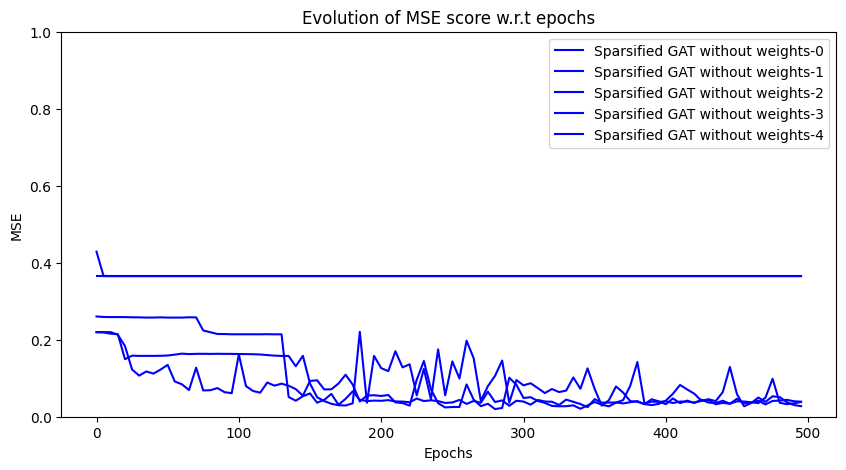

In [13]:
all_MSE_tests = []
for i in range(NUM_EXPERIMENTS):
    MSE_test = evaluate(all_best_models[i], loss_fcn, device, test_dataloader)
    print(f"MSE of {model_name}-{i} on the test set: {MSE_test:.4f}")
    all_MSE_tests.append(MSE_test)
print(f"OVERALL: MSE of {model_name} on the test set: {np.median(np.array(all_MSE_tests)):.4f}")

plot_MSE_scores(all_epoch_lists, all_MSEs, model_name=model_name)

### Sparsified GCN Without Weights

In [14]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("\nDevice: ", device)

model_name = "Sparsified GCN without weights"

num_epochs = 500
all_best_models = []
all_epoch_lists = []
all_MSEs = []
for _ in range(NUM_EXPERIMENTS):
    graph_convolution_no_weights = GCN(
        input_size=n_features,
        hidden_size=64,
        output_size=1
    ).to(device)

    loss_fcn = nn.MSELoss()
    optimizer = torch.optim.Adam(graph_convolution_no_weights.parameters(), lr=0.002)
    epoch_list, MSEs, best_model = train(graph_convolution_no_weights, loss_fcn, device, optimizer, num_epochs, train_dataloader, val_dataloader)
    all_best_models.append(best_model)
    all_epoch_lists.append(epoch_list)
    all_MSEs.append(MSEs)


Device:  cpu
Epoch 00001 | Loss: 0.2391
MSE: 0.2197
Epoch 00002 | Loss: 0.2373
Epoch 00003 | Loss: 0.2314
Epoch 00004 | Loss: 0.2080
Epoch 00005 | Loss: 0.1599
Epoch 00006 | Loss: 0.1318
MSE: 0.2503
Epoch 00007 | Loss: 0.1280
Epoch 00008 | Loss: 0.1286
Epoch 00009 | Loss: 0.1271
Epoch 00010 | Loss: 0.1244
Epoch 00011 | Loss: 0.1221
MSE: 0.2546
Epoch 00012 | Loss: 0.1172
Epoch 00013 | Loss: 0.1165
Epoch 00014 | Loss: 0.1144
Epoch 00015 | Loss: 0.1137
Epoch 00016 | Loss: 0.1135
MSE: 0.2528
Epoch 00017 | Loss: 0.1126
Epoch 00018 | Loss: 0.1121
Epoch 00019 | Loss: 0.1117
Epoch 00020 | Loss: 0.1110
Epoch 00021 | Loss: 0.1106
MSE: 0.2517
Epoch 00022 | Loss: 0.1100
Epoch 00023 | Loss: 0.1094
Epoch 00024 | Loss: 0.1089
Epoch 00025 | Loss: 0.1083
Epoch 00026 | Loss: 0.1077
MSE: 0.2504
Epoch 00027 | Loss: 0.1071
Epoch 00028 | Loss: 0.1065
Epoch 00029 | Loss: 0.1059
Epoch 00030 | Loss: 0.1053
Epoch 00031 | Loss: 0.1046
MSE: 0.2490
Epoch 00032 | Loss: 0.1040
Epoch 00033 | Loss: 0.1033
Epoch 00034

MSE of Sparsified GCN without weights-0 on the test set: 0.0258
MSE of Sparsified GCN without weights-1 on the test set: 0.0254
MSE of Sparsified GCN without weights-2 on the test set: 0.0506
MSE of Sparsified GCN without weights-3 on the test set: 0.0773
MSE of Sparsified GCN without weights-4 on the test set: 0.3976
OVERALL: MSE of Sparsified GCN without weights on the test set: 0.0506


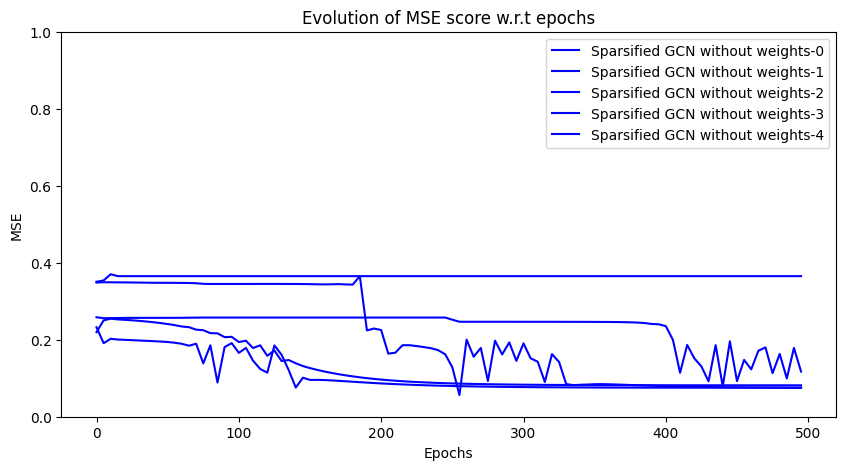

In [15]:
all_MSE_tests = []
for i in range(NUM_EXPERIMENTS):
    MSE_test = evaluate(all_best_models[i], loss_fcn, device, test_dataloader)
    print(f"MSE of {model_name}-{i} on the test set: {MSE_test:.4f}")
    all_MSE_tests.append(MSE_test)
print(f"OVERALL: MSE of {model_name} on the test set: {np.median(np.array(all_MSE_tests)):.4f}")

plot_MSE_scores(all_epoch_lists, all_MSEs, model_name=model_name)

## Original Graphs With Weights

In [16]:
batch_size = 1

# train dataset
train_dataset = PyGAcademicGraph(split="train", setting="inductive")
train_dataloader = DataLoader(train_dataset, batch_size=batch_size)

# val dataset
val_dataset = PyGAcademicGraph(split="val", setting="inductive")
val_dataloader = DataLoader(val_dataset, batch_size=batch_size)

# test dataset
test_dataset = PyGAcademicGraph(split="test", setting="inductive")
test_dataloader = DataLoader(test_dataset, batch_size=batch_size)

# number of features
n_features = train_dataset[0].x.shape[1]

print("Number of samples in the train dataset: ", len(train_dataset))
print("Number of samples in the val dataset: ", len(test_dataset))
print("Number of samples in the test dataset: ", len(test_dataset))
print("Output of one sample from the train dataset: ", train_dataset[0])
print("Edge_index :")
print(train_dataset[0].edge_index)
print("Number of features per node: ", n_features)

Number of samples in the train dataset:  9
Number of samples in the val dataset:  9
Number of samples in the test dataset:  9
Output of one sample from the train dataset:  Data(edge_index=[2, 36936], y=[359], x=[359, 8], edge_attr=[36936, 3], domain='Academia', train_mask=[359], val_mask=[359], test_mask=[359], mask=[359])
Edge_index :
tensor([[  0,   0,   0,  ..., 357, 358, 358],
        [  1,  89, 121,  ..., 352,  89, 358]])
Number of features per node:  8


### Message-passing GCN Without Weights

In [17]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("\nDevice: ", device)

model_name = "Message-passing GCN with weights"

num_epochs = 500
all_best_models = []
all_epoch_lists = []
all_MSEs = []
for _ in range(NUM_EXPERIMENTS):
    graph_convolution_no_weights = MPGCN_Net(
        in_channels=n_features,
        hidden_channels=64,
        out_channels=1,
        weighted_graph=True
    ).to(device)

    loss_fcn = nn.MSELoss()
    optimizer = torch.optim.Adam(graph_convolution_no_weights.parameters(), lr=0.001)
    epoch_list, MSEs, best_model = train(graph_convolution_no_weights, loss_fcn, device, optimizer, num_epochs, train_dataloader, val_dataloader)
    all_best_models.append(best_model)
    all_epoch_lists.append(epoch_list)
    all_MSEs.append(MSEs)


Device:  cpu
Epoch 00001 | Loss: 0.2645
MSE: 0.3189
Epoch 00002 | Loss: 0.2563
Epoch 00003 | Loss: 0.2480
Epoch 00004 | Loss: 0.2378
Epoch 00005 | Loss: 0.2223
Epoch 00006 | Loss: 0.2019
MSE: 0.2916
Epoch 00007 | Loss: 0.1831
Epoch 00008 | Loss: 0.1660
Epoch 00009 | Loss: 0.1459
Epoch 00010 | Loss: 0.1269
Epoch 00011 | Loss: 0.1139
MSE: 0.2407
Epoch 00012 | Loss: 0.1121
Epoch 00013 | Loss: 0.1117
Epoch 00014 | Loss: 0.1114
Epoch 00015 | Loss: 0.1103
Epoch 00016 | Loss: 0.1101
MSE: 0.2273
Epoch 00017 | Loss: 0.1102
Epoch 00018 | Loss: 0.1101
Epoch 00019 | Loss: 0.1099
Epoch 00020 | Loss: 0.1097
Epoch 00021 | Loss: 0.1095
MSE: 0.2259
Epoch 00022 | Loss: 0.1093
Epoch 00023 | Loss: 0.1091
Epoch 00024 | Loss: 0.1090
Epoch 00025 | Loss: 0.1088
Epoch 00026 | Loss: 0.1086
MSE: 0.2259
Epoch 00027 | Loss: 0.1085
Epoch 00028 | Loss: 0.1083
Epoch 00029 | Loss: 0.1081
Epoch 00030 | Loss: 0.1079
Epoch 00031 | Loss: 0.1077
MSE: 0.2262
Epoch 00032 | Loss: 0.1075
Epoch 00033 | Loss: 0.1072
Epoch 00034

MSE of Message-passing GCN with weights-0 on the test set: 0.0113
MSE of Message-passing GCN with weights-1 on the test set: 0.2490
MSE of Message-passing GCN with weights-2 on the test set: 0.2490
MSE of Message-passing GCN with weights-3 on the test set: 0.2490
MSE of Message-passing GCN with weights-4 on the test set: 0.2490
OVERALL: MSE of Message-passing GCN with weights on the test set: 0.2490


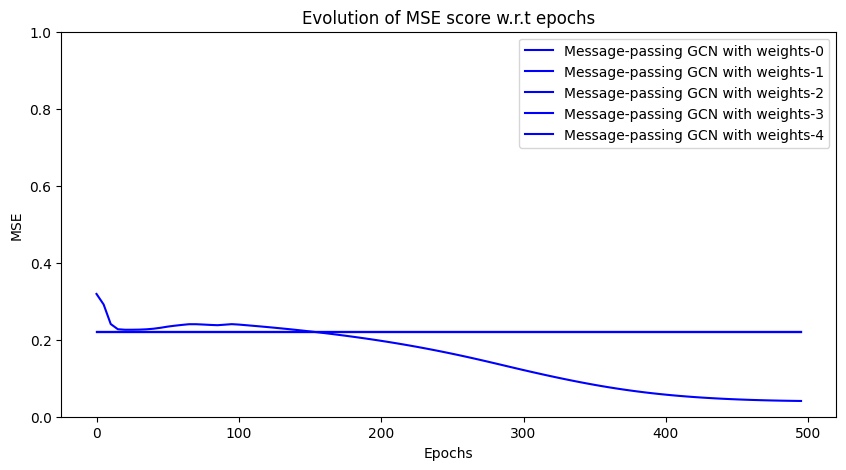

In [18]:
all_MSE_tests = []
for i in range(NUM_EXPERIMENTS):
    MSE_test = evaluate(all_best_models[i], loss_fcn, device, test_dataloader)
    print(f"MSE of {model_name}-{i} on the test set: {MSE_test:.4f}")
    all_MSE_tests.append(MSE_test)
print(f"OVERALL: MSE of {model_name} on the test set: {np.median(np.array(all_MSE_tests)):.4f}")

plot_MSE_scores(all_epoch_lists, all_MSEs, model_name=model_name)